In [1]:
import pandas as pd
import datetime as dt

df = pd.read_csv('online_retail_listing.csv', sep=";", encoding="cp1251")

In [2]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [3]:
df.describe()

,Quantity,Customer ID
count,1.048575e+06,811893.000000
mean,9.957525e+00,15324.712265
std,1.335187e+02,1697.033034
min,-7.421500e+04,12346.000000
25%,1.000000e+00,13971.000000
50%,3.000000e+00,15260.000000
75%,1.000000e+01,16795.000000
max,7.421500e+04,18287.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [5]:
print(df.shape)

(1048575, 8)


In [6]:
# Clean data
df.dropna(inplace=True)

In [7]:
print(df.shape)

(811893, 8)


In [8]:
pd.set_option('display.float_format', '{:.0f}'.format)
print(df['Customer ID'].value_counts())

Customer ID
17841    12780
14911    11328
12748     7100
14606     6608
15311     4664
         ...  
13256        1
18184        1
12636        1
13017        1
14424        1
Name: count, Length: 5924, dtype: int64


In [9]:
# Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d.%m.%Y %H:%M")

In [10]:
# Calculate Recency, Frequency, and Monetary values
today_date = df['InvoiceDate'].max() + dt.timedelta(days=2)
rfm_table = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,
    'Customer ID': lambda x: len(x),
    'Quantity': lambda x: x.sum()
})

In [11]:
# Rename columns
rfm_table.rename(columns={'InvoiceDate': 'recency',
                          'Customer ID': 'frequency',
                          'Quantity': 'monetary_value'}, inplace=True)

In [12]:
# Assign RFM scores using qcut
rfm_table['r_score'] = pd.qcut(rfm_table['recency'], 4, labels=range(4, 0, -1))
rfm_table['f_score'] = pd.qcut(rfm_table['frequency'], 4, labels=range(1, 5))
rfm_table['m_score'] = pd.qcut(rfm_table['monetary_value'], 4, labels=range(1, 5))

In [13]:
# Combine RFM scores
rfm_table['rfm_segment'] = rfm_table['r_score'].astype(str) + rfm_table['f_score'].astype(str) + rfm_table['m_score'].astype(str)
rfm_table['rfm_score'] = rfm_table[['r_score', 'f_score', 'm_score']].sum(axis=1)

print(rfm_table)

             recency  frequency  monetary_value r_score f_score m_score  \
Customer ID                                                               
12346            322         48              52       2       2       1   
12347             36        242            3094       3       4       4   
12348             72         51            2714       3       2       4   
12349             15        180            1619       4       4       4   
12350            306         17             197       2       1       2   
...              ...        ...             ...     ...     ...     ...   
18283              6        936            1591       4       4       4   
18284            426         29             493       1       2       3   
18285            657         12             145       1       1       1   
18286            473         70             592       1       3       3   
18287             39        156            3011       3       4       4   

            rfm_segment 

In [14]:
print(rfm_table.describe())

       recency  frequency  monetary_value  rfm_score
count     5924       5924            5924       5924
mean       204        137            1702          7
std        210        353            8448          3
min          2          1           -1085          3
25%         26         20             179          5
50%        103         53             468          7
75%        378        143            1313         10
max        735      12780          357262         12


In [24]:
rfm_table.head(n=25).sort_values(by='rfm_score', ascending=False)

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_segment,rfm_score
Customer ID,,,,,,,,
12349,15,180,1619,4,4,4,444,12
12359,4,375,2526,4,4,4,444,12
12362,7,245,1992,4,4,4,444,12
12347,36,242,3094,3,4,4,344,11
12371,41,167,1436,3,4,4,344,11
12357,29,296,6587,3,4,4,344,11
12356,19,143,3417,4,3,4,434,11
12370,47,202,2605,3,4,4,344,11
12360,48,218,2458,3,4,4,344,11


In [16]:
# rfm_table['recency'] = rfm_table['recency'].astype(np.float32)
# rfm_table['frequency'] = rfm_table['frequency'].astype(np.float32)
# rfm_table['monetary_value'] = rfm_table['monetary_value'].astype(np.float32)

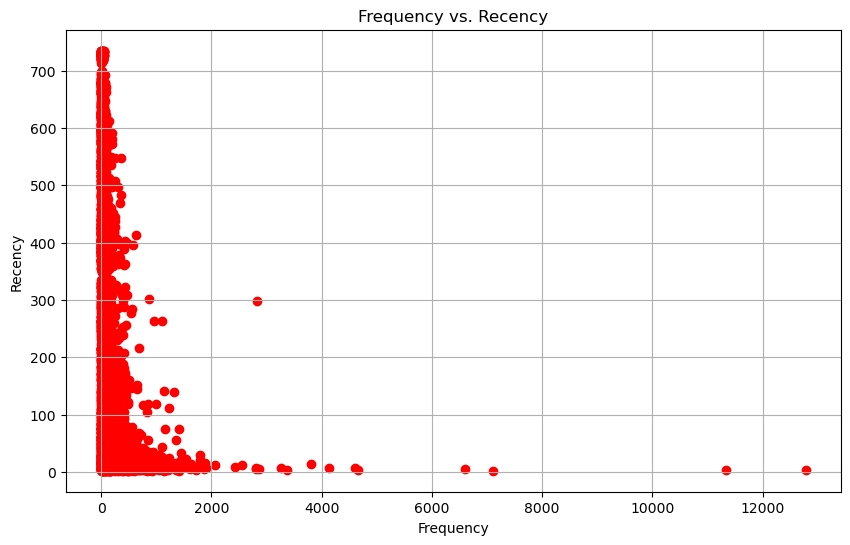

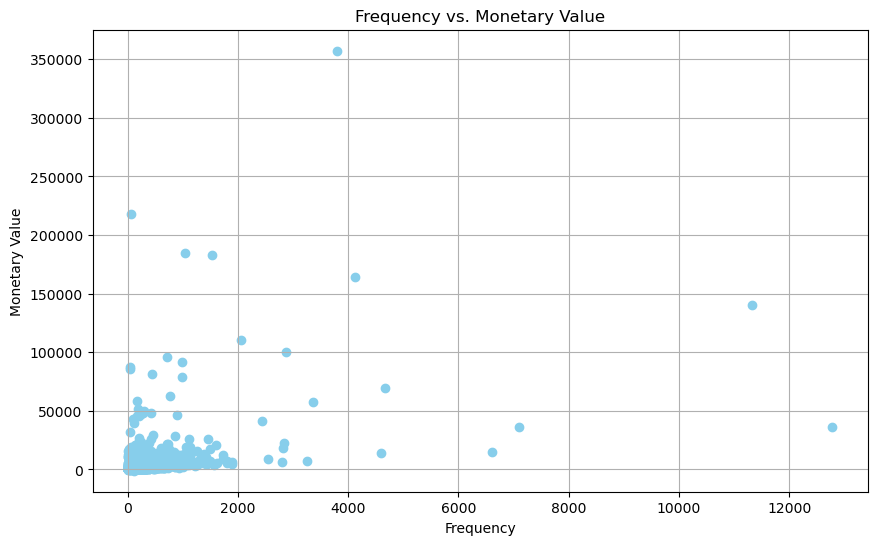

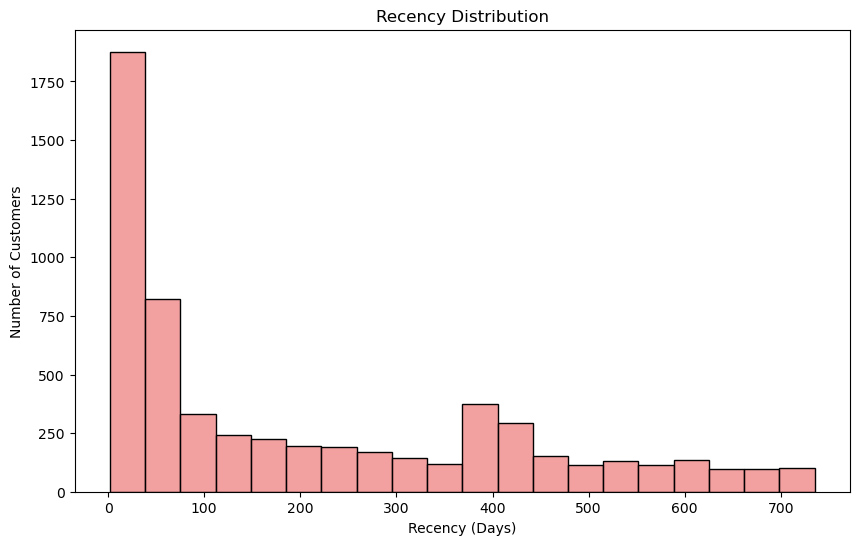

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Create a heatmap for the RFM segments
# plt.figure(figsize=(10, 8))
# sns.heatmap(rfm_table, annot=True, fmt=".0f", cmap="YlGnBu")
# plt.title("RFM Segments")
# plt.xlabel("Frequency")
# plt.ylabel("Recency")
# plt.show()

# Create a scatter plot of Frequency vs. recency
plt.figure(figsize=(10, 6))
plt.scatter(rfm_table["frequency"], rfm_table["recency"], color="red")
plt.title("Frequency vs. Recency")
plt.xlabel("Frequency")
plt.ylabel("Recency")
plt.grid(True)
plt.show()

# Create a scatter plot of Frequency vs. Monetary value
plt.figure(figsize=(10, 6))
plt.scatter(rfm_table["frequency"], rfm_table["monetary_value"], color="skyblue")
plt.title("Frequency vs. Monetary Value")
plt.xlabel("Frequency")
plt.ylabel("Monetary Value")
plt.grid(True)
plt.show()

# Create a bar chart of Recency distribution
plt.figure(figsize=(10, 6))
sns.histplot(rfm_table["recency"], bins=20, color="lightcoral")
plt.title("Recency Distribution")
plt.xlabel("Recency (Days)")
plt.ylabel("Number of Customers")
plt.show()

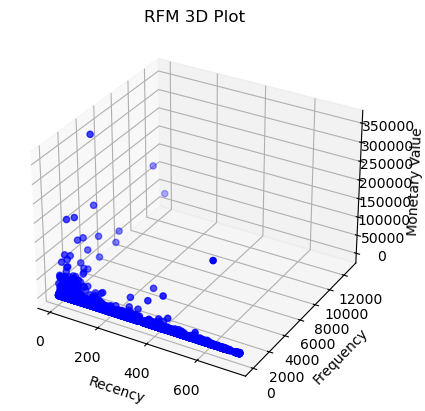

In [19]:
fig = plt.figure()
ax = plt.axes(projection="3d")

x = rfm_table["recency"]
y = rfm_table["frequency"]
z = rfm_table["monetary_value"]

ax.scatter3D(rfm_table['recency'], rfm_table['frequency'], rfm_table['monetary_value'], c='blue', marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('RFM 3D Plot')

plt.show()

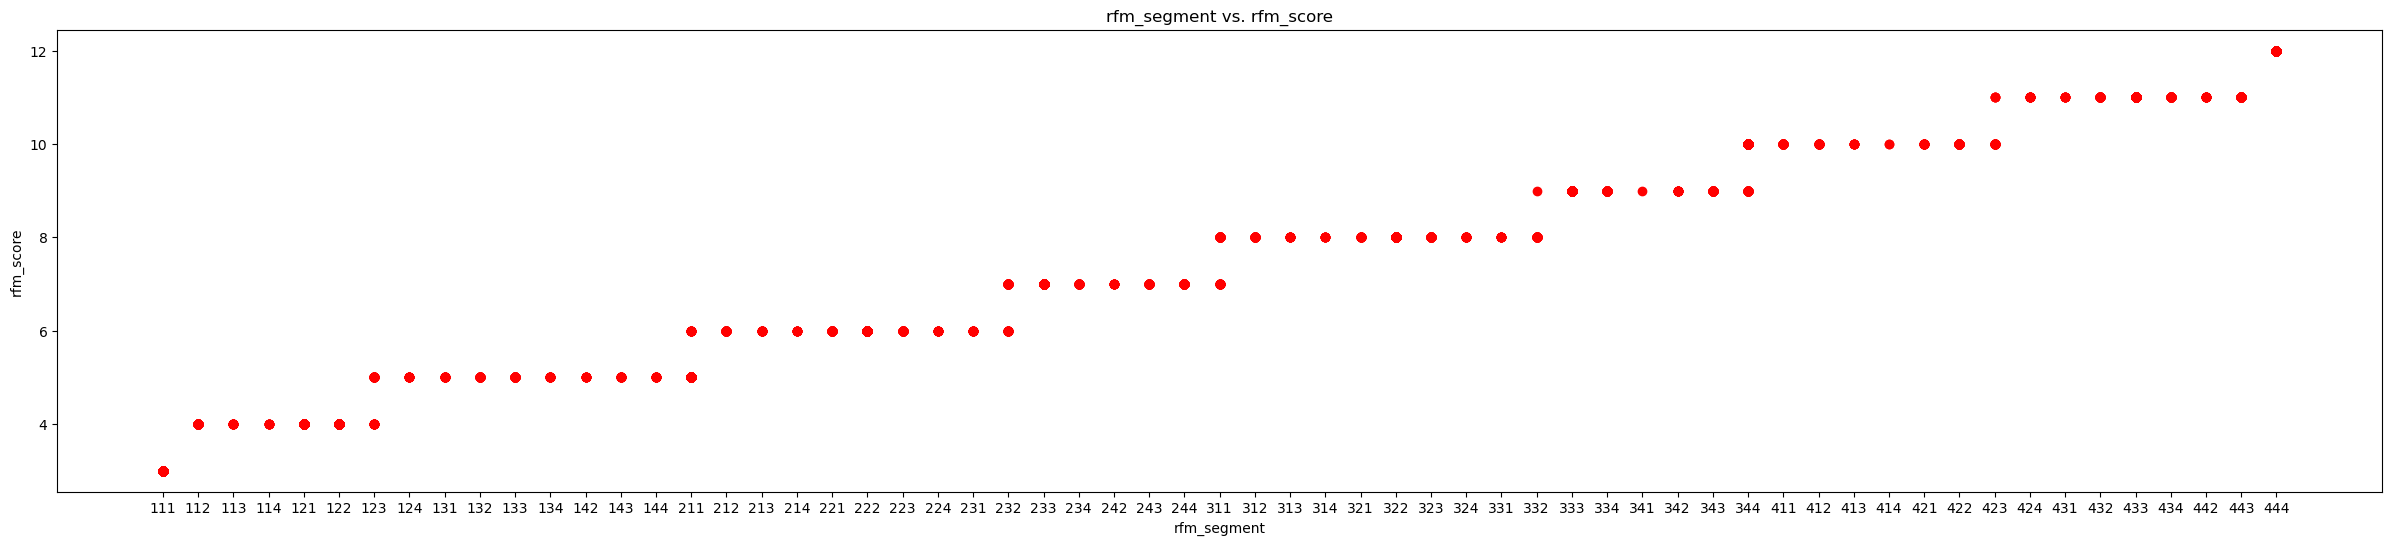

In [25]:
plt.figure(figsize=(30, 6))
plt.scatter(rfm_table["rfm_segment"].sort_values(), rfm_table["rfm_score"].sort_values(), color="red")
plt.title("rfm_segment vs. rfm_score")
plt.xlabel("rfm_segment")
plt.ylabel("rfm_score")
plt.grid(False)
plt.show()